In [2]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv("dc_airbnb.csv")


In [3]:
dc_listings["price"] = dc_listings["price"].str.replace("$","").str.replace(",","").astype(float)

In [4]:
np.random.seed(1)
shuffle = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.loc[shuffle,:]

In [5]:
dc_listings.index

Int64Index([ 574, 1593, 3091,  420,  808, 3492,  364, 1412, 3219,  756,
            ...
             129,  144,  960, 2895, 3717, 2763,  905, 1096,  235, 1061],
           dtype='int64', length=3723)

In [6]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

In [7]:



cols = ["host_response_rate","host_acceptance_rate", 
        "room_type","latitude","longitude","city","zipcode","state"]
dc_listings = dc_listings.drop(cols, axis = 1)

In [8]:
dc_listings.isnull().sum()

host_listings_count       0
accommodates              0
bedrooms                 21
bathrooms                27
beds                     11
price                     0
cleaning_fee           1388
security_deposit       2297
minimum_nights            0
maximum_nights            0
number_of_reviews         0
dtype: int64

In [9]:
dc_listings = dc_listings.drop(["cleaning_fee","security_deposit"], axis = 1)

In [10]:
dc_listings.isnull().sum()

host_listings_count     0
accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

In [11]:



dc_listings.dropna(axis = 0, inplace = True)

In [12]:
dc_listings.isnull().sum()

host_listings_count    0
accommodates           0
bedrooms               0
bathrooms              0
beds                   0
price                  0
minimum_nights         0
maximum_nights         0
number_of_reviews      0
dtype: int64

In [13]:

dc_listings.head()

,host_listings_count,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,1,2,1.0,1.0,1.0,125.0,1,4,149
1593,2,2,1.0,1.5,1.0,85.0,1,30,49
3091,1,1,1.0,0.5,1.0,50.0,1,1125,1
420,480,2,1.0,1.0,1.0,209.0,4,730,2
808,3,12,5.0,2.0,5.0,215.0,2,1825,34


In [14]:
normalize_listing = (dc_listings -dc_listings.mean())/dc_listings.std()

In [15]:
# z = x - mean/s.d

In [16]:
normalize_listing.head()

,host_listings_count,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.190090,-0.596544,-0.249467,-0.439151,-0.546858,-0.173345,-0.341375,-0.016604,4.579650
1593,-0.174005,-0.596544,-0.249467,0.412923,-0.546858,-0.464148,-0.341375,-0.016603,1.159275
3091,-0.190090,-1.095499,-0.249467,-1.291226,-0.546858,-0.718601,-0.341375,-0.016573,-0.482505
420,7.514311,-0.596544,-0.249467,-0.439151,-0.546858,0.437342,0.487635,-0.016584,-0.448301
808,-0.157921,4.393004,4.507903,1.264998,2.829956,0.480962,-0.065038,-0.016553,0.646219


In [17]:
normalize_listing["price"] = dc_listings["price"]

In [18]:
normalize_listing.head()

,host_listings_count,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.190090,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.174005,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-0.190090,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
420,7.514311,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
808,-0.157921,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [19]:
total_rows = normalize_listing.shape[0]
total_rows 

3671

In [20]:
train = normalize_listing[:int(total_rows*.75)]
test = normalize_listing[int(total_rows*.75):]

In [21]:
features = ["accommodates","bedrooms","bathrooms","beds"]
target = "price"

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
#scikit learn

In [24]:
knn = KNeighborsRegressor(algorithm='brute')
knn.fit(train[features],train[target])
predictions = knn.predict(test[features])

In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
rmse

122.1951006152828

In [26]:
feature = normalize_listing.columns.drop("price")
target = "price"

In [27]:
knn = KNeighborsRegressor(algorithm='brute')
knn.fit(train[feature],train[target])
predictions = knn.predict(test[feature])

mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
rmse

119.91972078666294

In [28]:
# Hyperparameter Optimization

In [29]:
k = [1,5,10,15,20]

rmses = []
for i in k:
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(train[features],train[target])
    predictions = knn.predict(test[features])
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    rmses.append(rmse)

In [30]:
rmses

[158.92817399069753,
 128.89081292230807,
 122.15647439850565,
 122.09759798039808,
 122.83805164047453]

In [68]:
knn = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

In [69]:
knn.fit(train[feature], train[target])
predict = knn.predict(test[feature])

In [70]:
mse = mean_squared_error(test[target],predict)
rmse = np.sqrt(mse)
rmse

123.30091540917586

In [71]:
import matplotlib.pyplot as plt

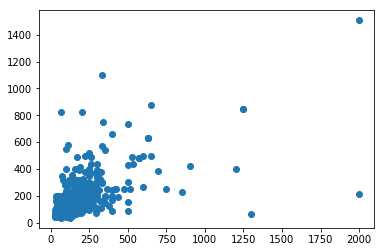

In [72]:
plt.scatter(test[target],predict)